In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.interpolate import interp1d
import glob
import bisect
from scipy.stats import norm
from scipy.signal import savgol_filter
import pandas as pd

from gwtess import Gwtess, Gwtess_galaxy
%matplotlib inline

In [2]:
d = '/Users/tom/gitcode/Kasen_Kilonova_Models_2017/kilonova_models/'
fn = d + 'knova_d1_n10_m0.040_vk0.15_Xlan1e-2.0.h5'
fn = d + 'knova_d1_n50_m0.025_vk0.25_fd0.3_Xlan1e-6.0_vs0.32_ns12.0.h5'
# fn = d + 'knova_d1_n10_m0.025_vk0.30_Xlan1e-4.0.h5'


In [5]:
fin = h5py.File(fn, 'r')

In [6]:
nu    = np.array(fin['nu'],dtype='d')
# array of time in seconds
times = np.array(fin['time'])
# covert time to days
times = times/3600.0/24.0

In [7]:
# specific luminosity (ergs/s/Hz)
# this is a 2D array, Lnu[times][nu]
Lnu_all   = np.array(fin['Lnu'],dtype='d')

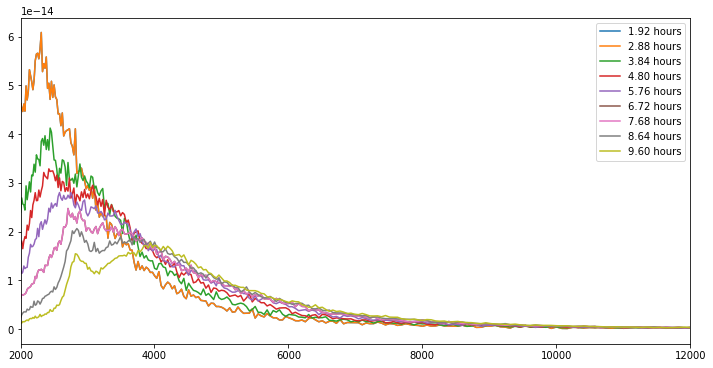

In [8]:

fig = plt.figure(figsize=[12,6])
# for example, get the spectrum at day 2.0
# for t in [0.04, 0.08, 0.49, 0.53, 1.46, 2.49, 3.46, 4.51, 7.45, 8.46]:
for t in np.arange(0.08,0.44,0.04):


    t = t
    # index corresponding to t
    it = bisect.bisect(times,t)
    # spectrum at this epoch
    Lnu = Lnu_all[it,:]
    
    # if you want thing in Flambda (ergs/s/Angstrom)
    c    = 2.99e10
    lam  = c/nu*1e8
    Llam = Lnu*nu**2.0/c/1e8
    
    #plot it up
    plt.plot(lam,Llam / (40 * 1.E6*3.086e+18)**2, label = '{:.2f} hours'.format(t*24))
    plt.xlim(2000,12000)
    
    outx = lam[::-1]
    outy = Llam[::-1] / (40 * 1.E6*3.086e+18)**2
    
    outy = outy[outx > 4000]
    outx = outx[outx > 4000]

    
#     np.savetxt('../data/redknova-at-{}.csv'.format(t),
#                         np.array([outx,outy]).T,
#               delimiter=',')
    
plt.legend()
    
# plt.xlim(2000,5000)
    

(1000, 10000)

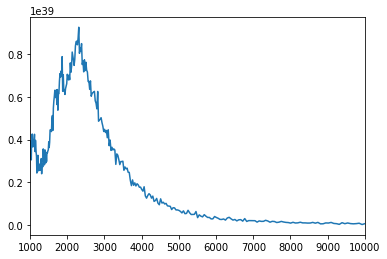

In [9]:
t = 0.08
it = bisect.bisect(times,t)
# spectrum at this epoch
Lnu = Lnu_all[it,:]

# if you want thing in Flambda (ergs/s/Angstrom)
c    = 2.99e10
lam  = c/nu*1e8
Llam = Lnu*nu**2.0/c/1e8

plt.plot(lam,Llam, label = t)
plt.xlim(1000,10000)

# np.savetxt('blue_kilonova_at_2hours.csv', np.array([lam,Llam]).T, delimiter=',')

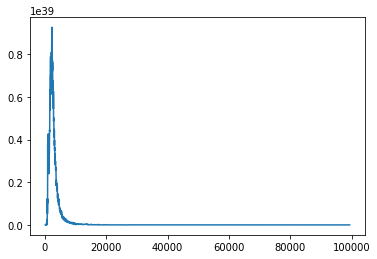

In [10]:
plt.plot(lam, Llam)

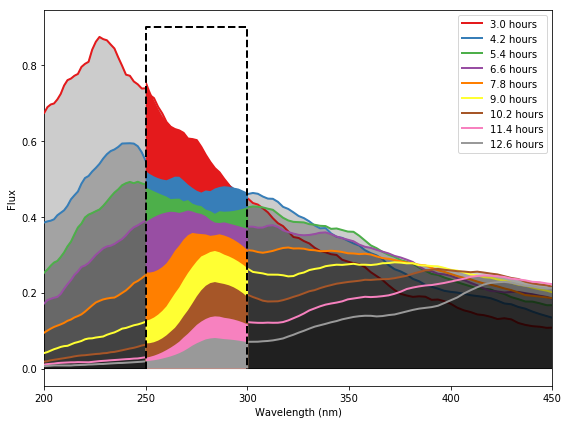

In [32]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)

fig = plt.figure(figsize=[8,6])
for it in range(42,51,1):
#     it = bisect.bisect(times,t)
    t = times[it]
    Lnu = Lnu_all[it,:]

    # if you want thing in Flambda (ergs/s/Angstrom)
    c    = 2.99e10
    lam  = c/nu*1e8
    Llam = Lnu*nu**2.0/c/1e8
    
    plt.plot(lam/10, savgol_filter(Llam/1.E39, 11, 2), label = '{:.1f} hours'.format(t*24), zorder=it+1,
            lw=2)

#     plt.plot(lam/10, Llam/1.E39, label = '{:.2f} hours'.format(t*24))
    plt.fill_between(lam/10, savgol_filter(Llam/1.E39, 11, 2), alpha=0.2, zorder=it, color='k')
    mask = (lam>=2500) * (lam <=3010)
    plt.fill_between(lam[mask]/10, savgol_filter(Llam[mask]/1.E39, 11, 2), alpha=1, zorder=it+12)

    
    
plt.xlim(200,450)
plt.legend()



# xvals = np.arange(200,350,1)
# plt.plot(xvals, norm.pdf(xvals, 275,10)*24)
# plt.fill_between(xvals, norm.pdf(xvals, 280,10)*24, alpha=0.3, zorder=0)

plt.plot([250,250,300,300], [0.,0.9,0.9,0], zorder=100, lw=2, color='k', ls='--')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux')
plt.tight_layout()
plt.savefig('model_knova-blue.png', dpi=200)

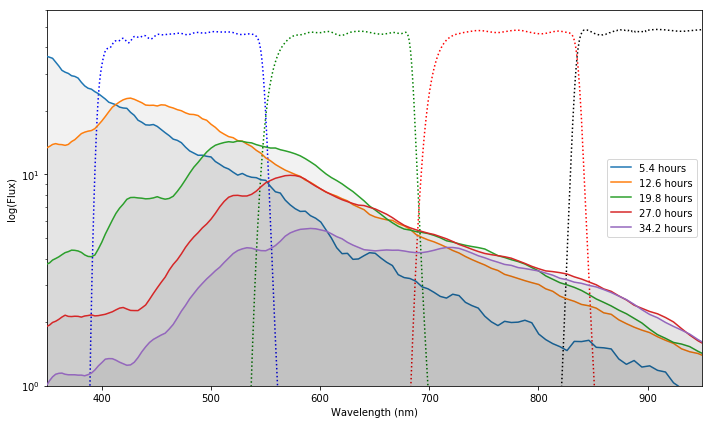

In [30]:
fig, ax = plt.subplots(1, 1, figsize=[10,6])
for it in range(44,72,6):
#     it = bisect.bisect(times,t)
    t = times[it]
    Lnu = Lnu_all[it,:]

    # if you want thing in Flambda (ergs/s/Angstrom)
    c    = 2.99e10
    lam  = c/nu*1e8
    Llam = Lnu*nu**2.0/c/1e8
    
    ax.plot(lam/10, savgol_filter(Llam/1.E37, 9, 2), label = '{:.1f} hours'.format(t*24), zorder=it)

#     plt.plot(lam/10, Llam/1.E39, label = '{:.2f} hours'.format(t*24))
    ax.fill_between(lam/10, savgol_filter(Llam/1.E37, 9, 3), alpha=0.05, zorder=it, color='k')

    
    
ax.set_xlim(350,950)
ax.set_ylim(1, 60)
ax.legend()

p = np.genfromtxt('../data/sloan-g.dat', skip_header=1, skip_footer=1).T
plt.plot(p[0], p[1]/2, color='blue', ls=':')
p = np.genfromtxt('../data/sloan-r.dat', skip_header=1, skip_footer=1).T
plt.plot(p[0], p[1]/2, color='green', ls=':')
p = np.genfromtxt('../data/sloan-i.dat', skip_header=1, skip_footer=1).T
plt.plot(p[0], p[1]/2, color='red', ls=':')
p = np.genfromtxt('../data/sloan-z.dat', skip_header=1, skip_footer=1).T
plt.plot(p[0], p[1]/2, color='k', ls=':')

ax.set_yscale('log')

# xvals = np.arange(200,350,1)
# plt.plot(xvals, norm.pdf(xvals, 275,10)*24)
# plt.fill_between(xvals, norm.pdf(xvals, 280,10)*24, alpha=0.3, zorder=0)

# plt.plot([250,250,300,300], [0.,0.9,0.9,0], zorder=100, lw=2, color='k', ls='--')

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('log(Flux)')
fig.tight_layout()
plt.savefig('model_knova-blue-NF.png', dpi=200)

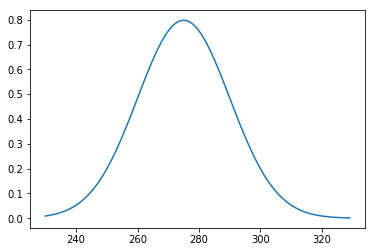

In [13]:
xvals = np.arange(230,330,1)
plt.plot(xvals, norm.pdf(xvals, 275,15)*30)

(0, 100)

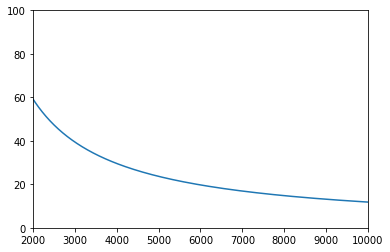

In [14]:
plt.plot(lam[:-1], np.diff(lam[::-1]))
plt.xlim(2000,10000)
plt.ylim(0,100)

In [15]:
700/30

23.333333333333332

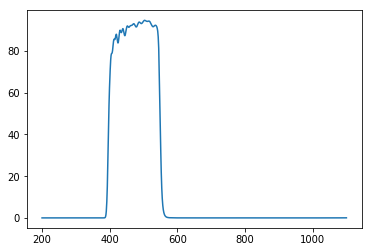

In [16]:
plt.plot(*np.genfromtxt('../data/sloan-g.dat', skip_header=1, skip_footer=1).T)

In [17]:
!less ../data/sloan-g.dat

#cumulative sum: 13873.3
1100            0.035118937
1099.5          0.032838978
1099            0.035747021
1098.5          0.03038015
1098            0.034326904
1097.5          0.03186414
1097            0.031240238
1096.5          0.031832181
1096            0.030423447
1095.5          0.031865302
1095            0.032525629
1094.5          0.029422797
1094            0.026329963
1093.5          0.029017249
1093            0.030039117
1092.5          0.029979078
1092            0.026919989
1091.5          0.028119365
1091            0.026985129
1090.5          0.025126498
1090            0.023572575
1089.5          0.026011357
1089            0.026421078
: